In [ ]:
# https://www.analyticsvidhya.com/blog/2021/12/stock-market-analysis-with-pandas-datareader-and-plotly-for-beginners/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas_datareader as pdr
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

tickers = ['GOOG', 'AMZN', 'MSFT']

data_source = 'stooq'
start_date = '2020-01-01' # year month day
end_date = '2024-11-01'

Google = pdr.DataReader('GOOG', data_source, start_date, end_date)
Amazon = pdr.DataReader('AMZN', data_source, start_date, end_date)
Microsoft = pdr.DataReader('MSFT', data_source, start_date, end_date)

df = pd.concat([Google, Amazon, Microsoft], axis=1, keys=tickers)
df.columns.names = ['Ticker', 'Prices']
df.head()

Ticker         GOOG                                          AMZN            \
Prices         Open     High       Low   Close    Volume     Open      High   
Date                                                                          
2024-11-01  171.540  173.820  170.3100  172.65  21752859  198.860  200.5000   
2024-10-31  174.720  178.420  172.5600  172.69  32801898  190.510  190.6000   
2024-10-30  182.410  183.790  175.7451  176.14  49698313  194.695  195.6100   
2024-10-29  169.385  171.860  168.6600  171.14  28916106  188.580  191.4599   
2024-10-28  170.590  170.606  165.7900  168.34  20858254  189.565  190.2100   

Ticker                                    MSFT                            \
Prices          Low   Close    Volume     Open    High       Low   Close   
Date                                                                       
2024-11-01  197.020  197.93  99687847  409.010  415.50  407.5000  410.37   
2024-10-31  185.230  186.40  75146759  415.360  416.16  406.3000  406.35   
2024-10-30  192.420  192.73  37707550  437.435  438.50  432.1000  432.53   
2024-10-29  187.815  190.83  35690158  428.000  433.17  425.8001  431.95   
2024-10-28  188.210  188.39  27930836  431.655  431.94  426.3000  426.59   

Ticker                  
Prices          Volume  
Date                    
2024-11-01  24230442.0  
2024-10-31  53970981.0  
2024-10-30  29749149.0  
2024-10-29  17644080.0  
2024-10-28  14882444.0

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

px.line(df.xs(key='GOOG', axis=1, level='Ticker')['Close'])

In [ ]:
px.line(df.xs(key='GOOG', axis=1, level='Ticker')['Close'], range_x=['2020-01-01','2020-12-31'])

In [ ]:
px.line(df.xs(key='Close', axis=1, level='Prices')[['GOOG', 'AMZN']])

In [ ]:
df.xs(key='Close', axis=1, level='Prices').head()
c = df.xs(key='Close', axis=1, level='Prices')
c.head()

Ticker,GOOG,AMZN,MSFT
Date,,,
2022-12-30,88.73,84.00,239.82
2022-12-29,88.95,84.18,241.01
2022-12-28,86.46,81.82,234.53
2022-12-27,87.93,83.04,236.96
2022-12-23,89.81,85.25,238.73


In [ ]:
plt.figure(figsize=(20,10))
fig = px.line(c)
fig.show();

<Figure size 2000x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
fig = px.area(c, facet_col='Ticker', facet_col_wrap=3)
fig.show();

<Figure size 2000x1000 with 0 Axes>

In [ ]:
fig = px.line(c, range_x=['2020-01-01','2020-12-31'])
fig.show()

In [ ]:
plt.figure(figsize=(24,16))
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['GOOG']['Open'],
                high = df['GOOG']['High'],
                low = df['GOOG']['Low'],
                close = df['GOOG']['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<Figure size 2400x1600 with 0 Axes>

In [ ]:
google = df['GOOG'].reset_index()
google = google.rename_axis(None, axis=1)
print(google.shape)
google.head()

(756, 6)


,Date,Open,High,Low,Close,Volume
0,2022-12-30,87.365,88.830,87.0300,88.73,19190296
1,2022-12-29,87.030,89.365,86.9900,88.95,18280660
2,2022-12-28,87.500,88.520,86.3701,86.46,17879567
3,2022-12-27,89.310,89.500,87.5350,87.93,15470870
4,2022-12-23,87.620,90.100,87.6200,89.81,17815010


In [ ]:
google = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
google.rename(columns={'close': 'Close'}, inplace=True)
google.head()

,date,open,high,low,Close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [ ]:
from sklearn.preprocessing import StandardScaler

# series = df['GOOG']['Close'].values.reshape(-1, 1)
series = google['Close'].values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

T = 20
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1239, 20, 1) Y.shape (1239, 1)


In [ ]:
### try autoregressive RNN model
import torch
import torch.nn as nn

class RNN(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.D = n_inputs
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)

  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # get RNN unit output
    out, _ = self.rnn(X, (h0, c0))

    # we only want h(T) at the final time step
    out = self.fc(out[:, -1, :])
    return out

In [ ]:
model = RNN(1, 5, 1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
# Training
def full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test,
            epochs=200):

  # Stuff to store
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    # Test loss
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it + 1) % 5 == 0:
      print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

  return train_losses, test_losses

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


RNN(
  (rnn): LSTM(1, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# sklearn model
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     google.drop('Close', axis=1),
#     google.Close,
#     test_size=0.25,
#     random_state=42)

X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

train_losses, test_losses = full_gd(model,
                                    criterion,
                                    optimizer,
                                    X_train,
                                    y_train,
                                    X_test,
                                    y_test)

Epoch 5/200, Train Loss: 0.6605, Test Loss: 4.6558
Epoch 10/200, Train Loss: 0.2416, Test Loss: 0.5361
Epoch 15/200, Train Loss: 0.1111, Test Loss: 0.7309
Epoch 20/200, Train Loss: 0.0657, Test Loss: 0.2691
Epoch 25/200, Train Loss: 0.0401, Test Loss: 0.0586
Epoch 30/200, Train Loss: 0.0170, Test Loss: 0.1334
Epoch 35/200, Train Loss: 0.0092, Test Loss: 0.0598
Epoch 40/200, Train Loss: 0.0091, Test Loss: 0.0579
Epoch 45/200, Train Loss: 0.0092, Test Loss: 0.0569
Epoch 50/200, Train Loss: 0.0083, Test Loss: 0.0467
Epoch 55/200, Train Loss: 0.0073, Test Loss: 0.0523
Epoch 60/200, Train Loss: 0.0067, Test Loss: 0.0452
Epoch 65/200, Train Loss: 0.0063, Test Loss: 0.0518
Epoch 70/200, Train Loss: 0.0061, Test Loss: 0.0442
Epoch 75/200, Train Loss: 0.0059, Test Loss: 0.0453
Epoch 80/200, Train Loss: 0.0057, Test Loss: 0.0416
Epoch 85/200, Train Loss: 0.0057, Test Loss: 0.0407
Epoch 90/200, Train Loss: 0.0056, Test Loss: 0.0379
Epoch 95/200, Train Loss: 0.0056, Test Loss: 0.0364
Epoch 100/200

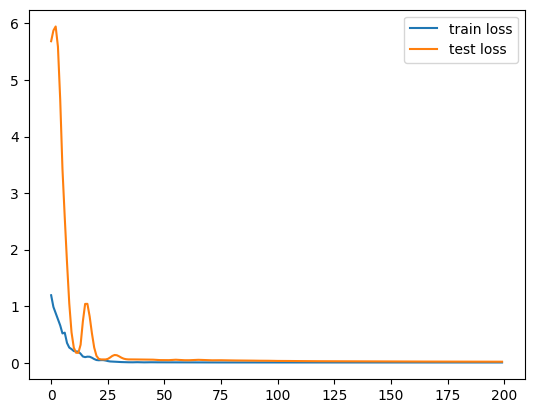

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
# One-step forecast using true targets
validation_target = Y
validation_predictions = []

# index of first validation input
i = 0

X_on_device = torch.from_numpy(X.astype(np.float32)).to(device)

while len(validation_predictions) < len(validation_target):
  input_ = X_on_device[i].reshape(1, T, 1)
  p = model(input_)[0,0].item() # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

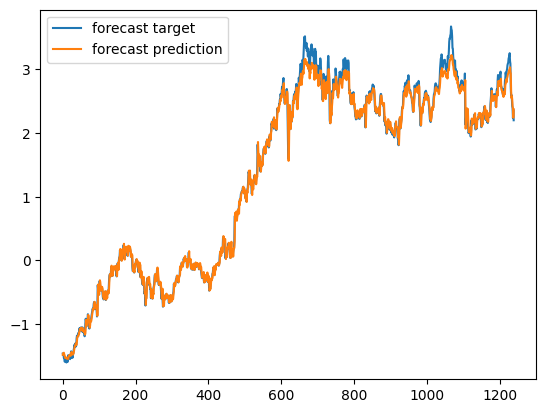

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X_test[0].view(T)

while len(validation_predictions) < len(validation_target):
  input_ = last_x.reshape(1, T, 1)
  p = model(input_)
  # [0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p[0,0].item())

  # make the new input
  last_x = torch.cat((last_x[1:], p[0]))

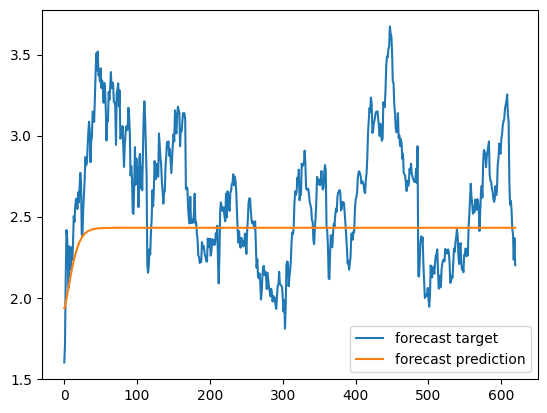

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

## Some Terms

Notes from Jose Portilla's Python for Financial Analysis and Algorithmic Trading

* Adjusted Close
* Moving Average / Rolling Mean
* Bollinger Bands
* Cumulative Return
* Daily Return
* Cumulative Daily Return
* Time Series
* Error - Trends - Seasonality (ETS) Models
* ETS Decomposition
* Exponentially Weighted Moving Averages (EWMA)
* Auto Regressive Integrated Moving Average (ARIMA)
* ACF - Autocorrelation Model
* PACF - Partial Autocorrelation Model
* Volatility
* Portfolio Allocation
* Sharpe Ratio
* Exchange Traded Funds (ETF)
* Mutual Funds
* Hedge Funds
* High Frequency Trading
* Selling Short and Long
* Capital Asset Pricing Model
* Stock Splits and Dividends
* Survivorship Bias
* Efficient Market Hypothesis
* Pairs Trading